<a href="https://colab.research.google.com/github/rohitrv8922/Bike-Sharing-Demand-Prediction/blob/main/ROHIT_VERMA_(Bike_Sharing_Demand_Prediction_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Modules**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

**Loading the Dataset into Google Colab**

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Loading Dataset

In [35]:
df='/content/drive/My Drive/'
bike_data=pd.read_csv(df +'SeoulBikeData.csv',encoding='latin-1')

**This dataframe presents the rented bike count in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.**

For each hour, the dataframe mainly presents weather conditions and information about the day.

In [36]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [37]:
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#Step 1 : Exploratory Data Analysis and Preprocessing

In [38]:
bike_data.shape

(8760, 14)

**We mainly have numeric values, datetime and str**

In [39]:
bike_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**Here is the statitical description of the features**

In [40]:
bike_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Checking Null Values in our Dataset**

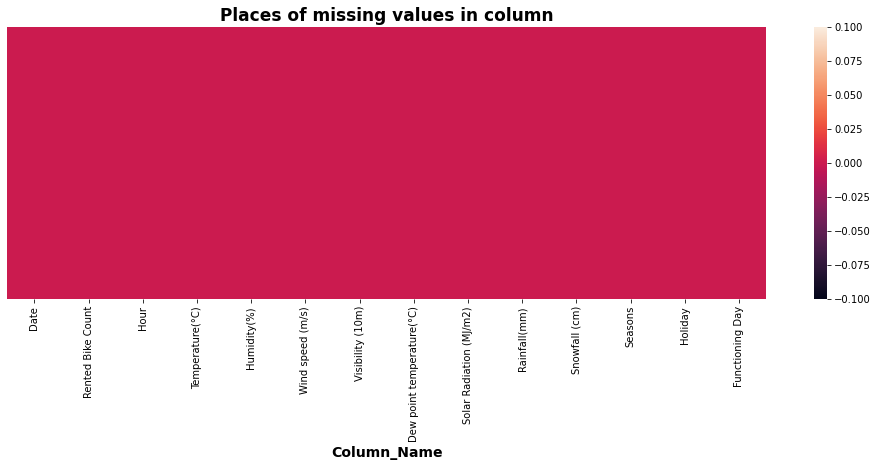

In [41]:
# No missin Values in our dataset
plt.figure(figsize=(17, 5))
sns.heatmap(bike_data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()


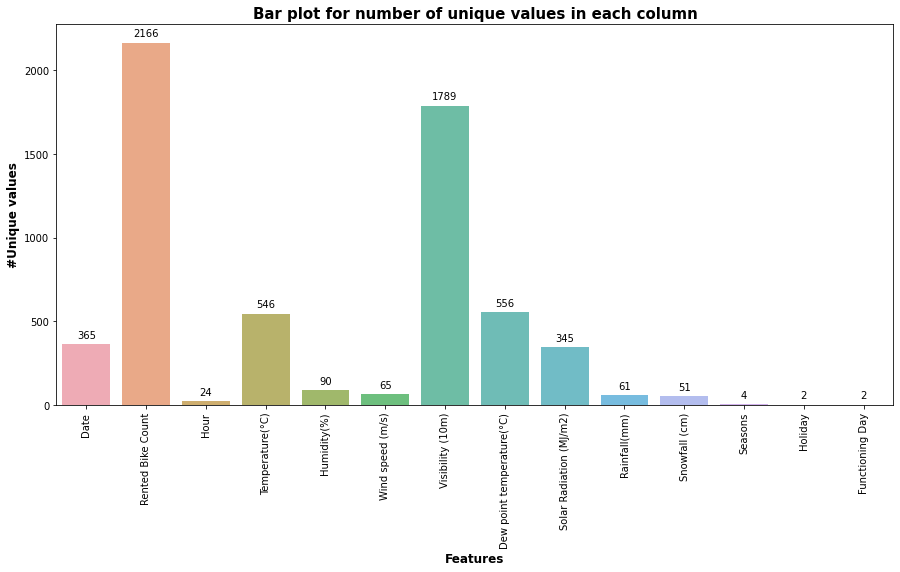

In [42]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = bike_data.columns
unique=[]
for i in bike_data.columns:
    unique.append(bike_data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

We convert as datetime the series 'Date'

In [43]:
# Date columns to Date format conversion

bike_data['Date']= pd.to_datetime(bike_data['Date'])

In [44]:
# extracting day,month, day of week and weekdays/weekend from date column

bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Month'] = bike_data['Date'].apply(lambda x : x.month)
bike_data['WeekDay'] = bike_data['Date'].dt.day_name()
bike_data=bike_data.drop(columns=['Date','WeekDay'],axis=1)

#Here are the correlations between variables

**We can see that on the target variable line the most correlated variables to the rent are**
1. the hour
2. the temperature
3. the dew point temperature
4. the solar radiation
(The dew point is a temperature which is so cold that the vapor becomes liquid)

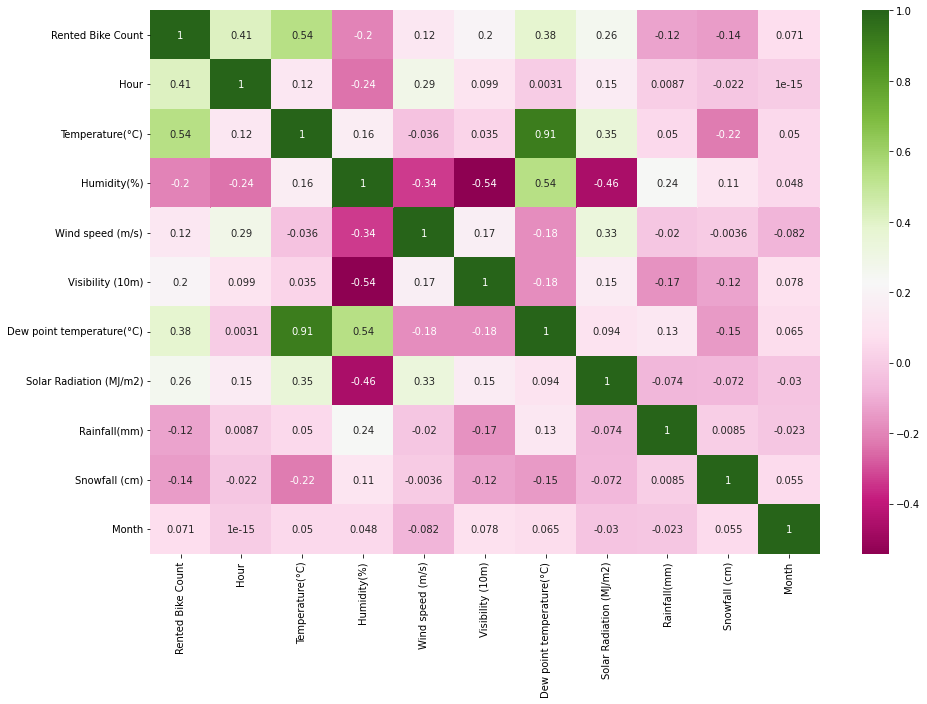

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_data.corr(),
            cmap='PiYG',
            annot=True)

In [46]:
nan_values=bike_data.isna()
nan_columns=nan_values.any()


columns_with_nan=bike_data.columns[nan_columns].tolist()
columns_with_nan

[]

In [47]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [48]:
bike_data.dropna(axis=1,how='all',thresh=None,subset=None,inplace=False)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)' so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [49]:
bike_data=bike_data.drop(['Dew point temperature(°C)'],axis=1)

**This is the list of sorted correlation of variables to the target**

In [50]:
df1Corr=pd.DataFrame(bike_data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Month,0.070861
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


#Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn

**Creating variables**

Variable which informs us if it is night or day

In [51]:
bike_data['label_day_night']=bike_data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

**Plotting variables to the target**

On this first plot, we see a high raise between April to autumn of bikes rent

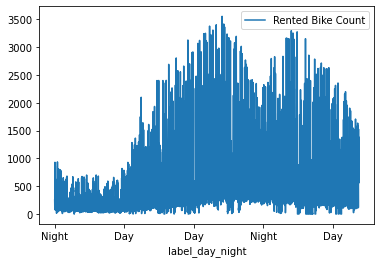

In [57]:
bike_data.plot(x='label_day_night',y='Rented Bike Count',kind='line')

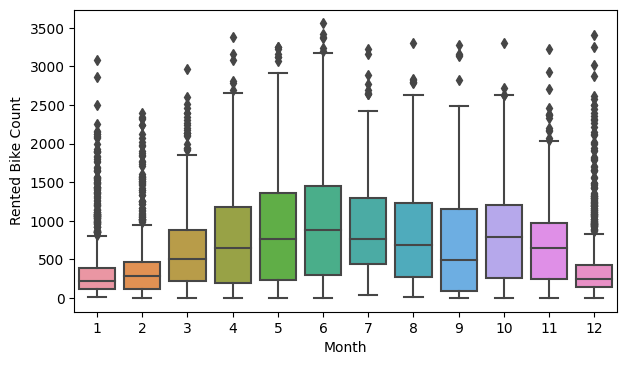

In [58]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='Month',y='Rented Bike Count',data=bike_data)
plt.show()

Conclusion:

We can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

Also demand of bike is maximum during May,june,july i.e Summer seasons

**So let's focus on the seasons where we have the most rents**

We can see that as we expected, summer is the season in which we have the most rents.
Let's try to understand why summer is the season with the most rents

In [59]:
df1VizSeasons=pd.DataFrame(bike_data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


**Let's verify that it is linked to the solar Radiation
This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'**

In [60]:
df1VizSolarRadiation=pd.DataFrame(bike_data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


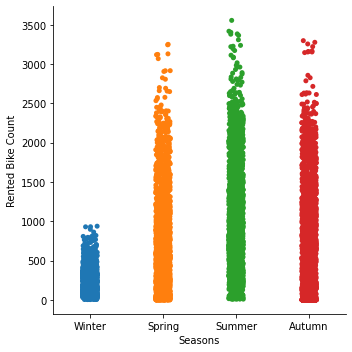

In [61]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=bike_data)

Conclusion

We can clearly see that there is less demand of rented bike during winter season








**Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**

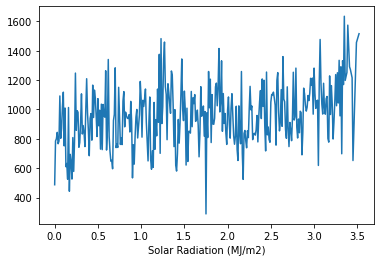

In [62]:
bike_data.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

**Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by biket**

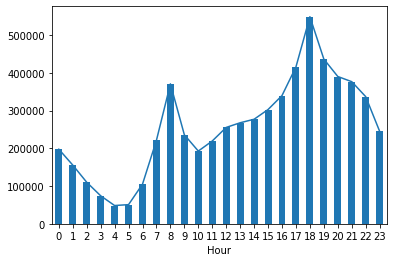

In [63]:
bike_data.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
bike_data.groupby('Hour').sum()['Rented Bike Count'].plot()

In [64]:
df1VizDays=pd.DataFrame(bike_data.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

KeyError: ignored

**Days with highest rented bike are week days**

So we suppose people rent bikes to go to work or school

**Korean people like to ride bikes when it is pretty hot around 25°C in average**

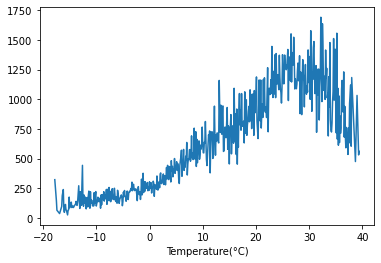

In [ ]:
bike_data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

Let's see the repartition of the rents follonwing the moment of the day

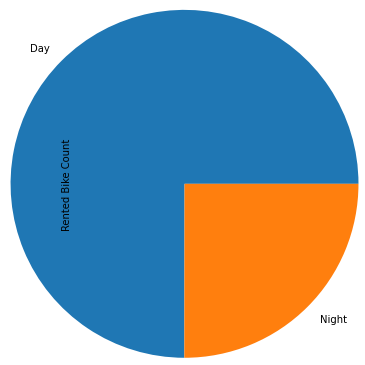

In [ ]:
bike_data.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie(radius=2)



**According to this boxplot there are much more rents during the day than the night**



As the median for the day is around 600 and the median for the night is around 350

In [ ]:
# Numeric Features

numeric_features= bike_data.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Month                    8760 non-null   int64         
 11  WeekDayEncoding          8760 non-null   int64         
dtypes: datetime64[ns](1), float64(5), 

In [ ]:
# describing numeric feature

numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80
Month,8760.0,6.526027,3.448048,1.0,4.00,7.00,10.00,12.00


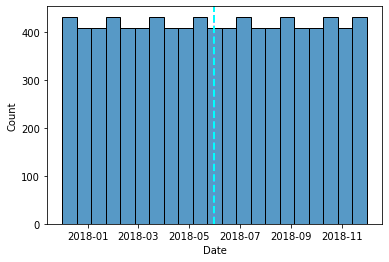

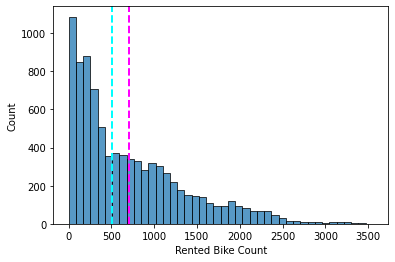

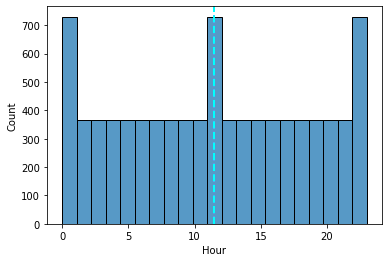

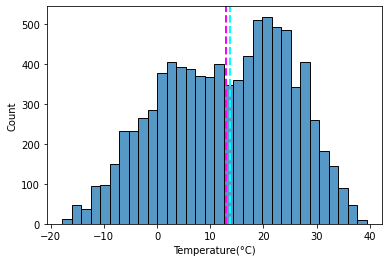

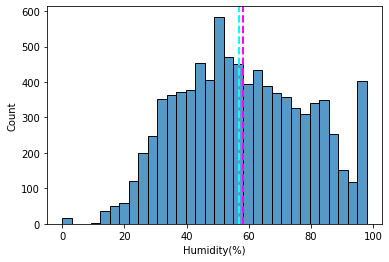

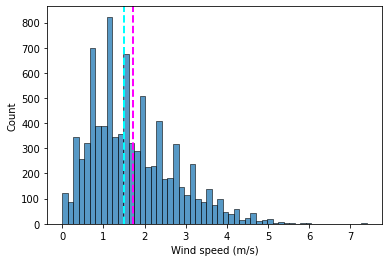

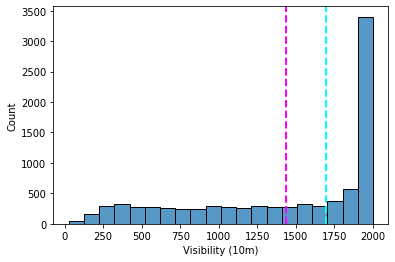

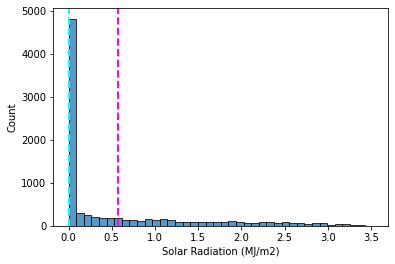

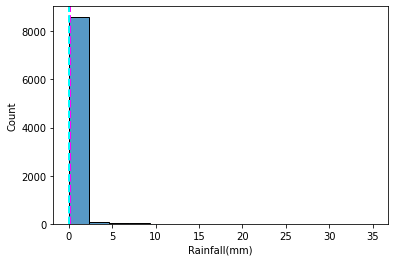

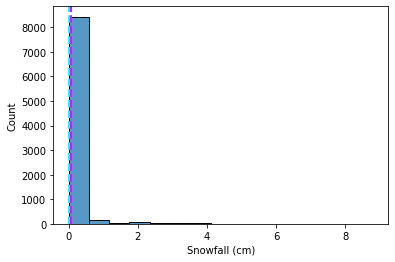

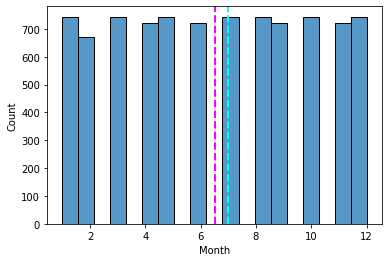

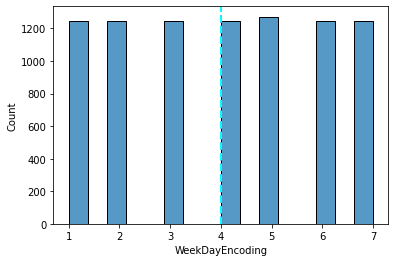

In [ ]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(bike_data[col])
  plt.axvline(bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

In [ ]:
#Extracting categorical features
categorical_features= bike_data.select_dtypes(include='object')

In [ ]:
categorical_features

,Seasons,Holiday,Functioning Day,label_day_night,WeekDay
0,Winter,No Holiday,Yes,Night,Friday
1,Winter,No Holiday,Yes,Night,Friday
2,Winter,No Holiday,Yes,Night,Friday
3,Winter,No Holiday,Yes,Night,Friday
4,Winter,No Holiday,Yes,Night,Friday
...,...,...,...,...,...
8755,Autumn,No Holiday,Yes,Day,Friday
8756,Autumn,No Holiday,Yes,Day,Friday
8757,Autumn,No Holiday,Yes,Night,Friday
8758,Autumn,No Holiday,Yes,Night,Friday


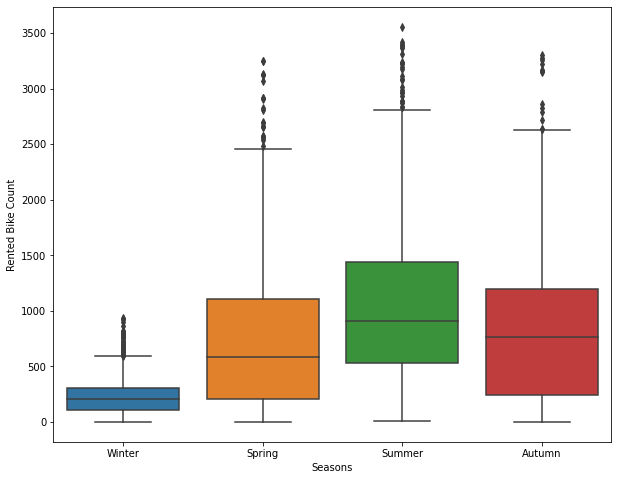

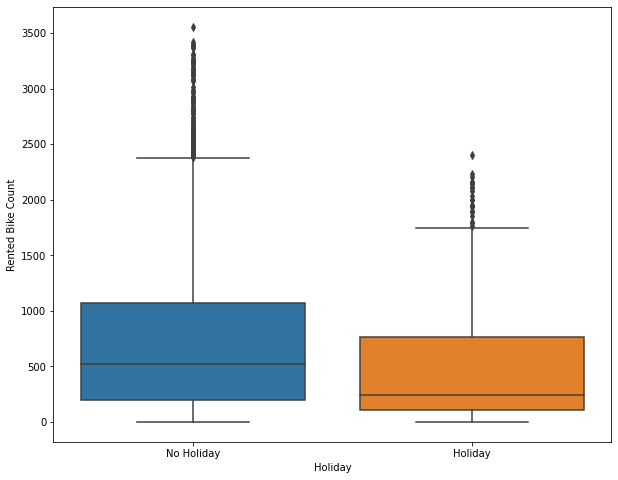

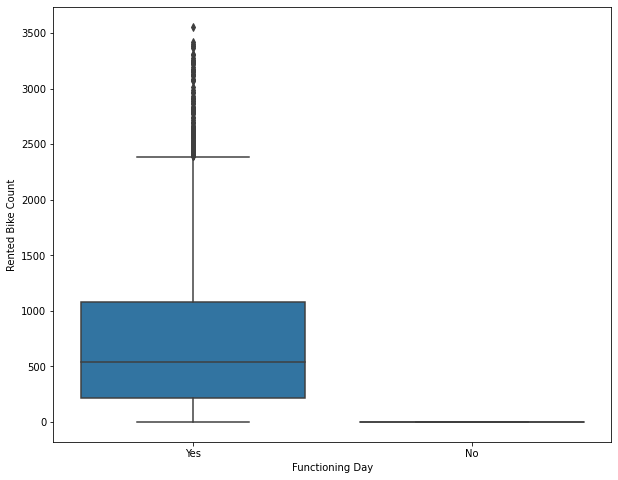

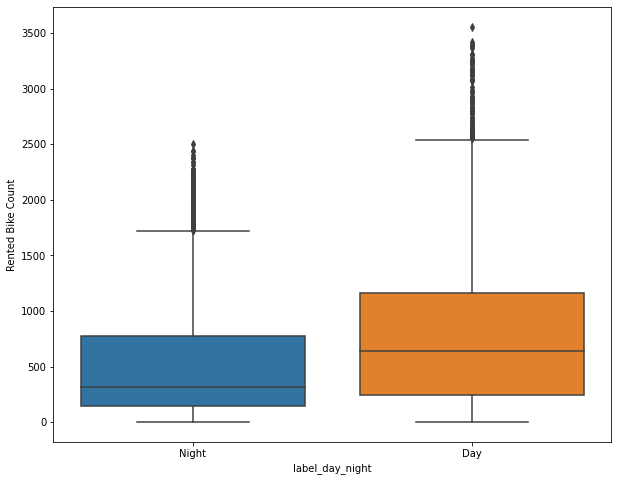

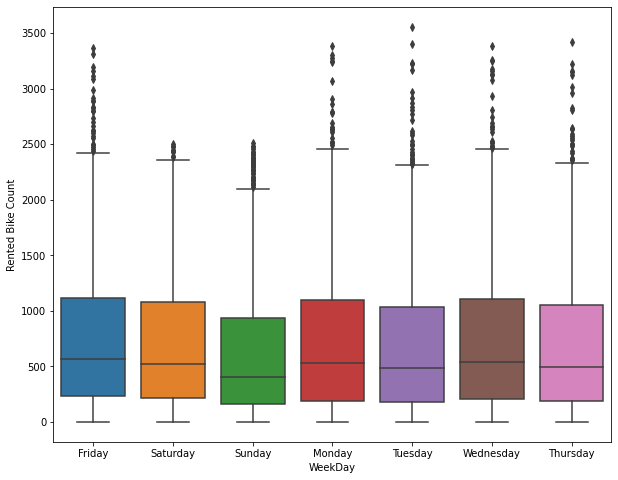

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_data[col],y=bike_data["Rented Bike Count"])
  plt.show()

  

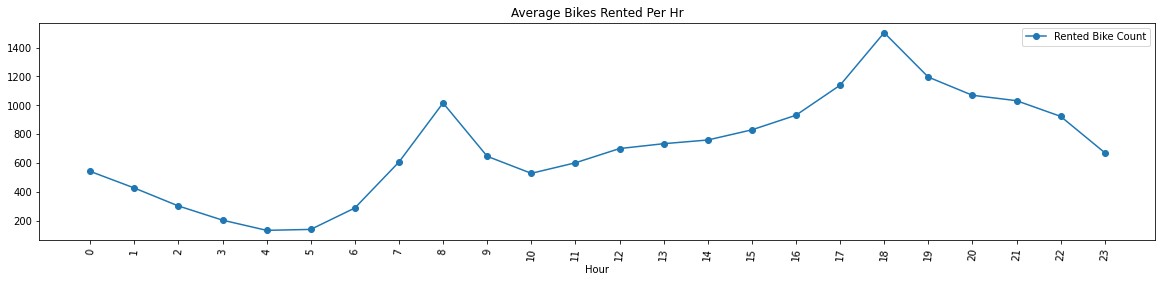

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);


High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour. we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand





In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
0,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,0,0,0,0,0,0,0
8756,0,0,0,1,1,0,0,0,0,0,0,0
8757,0,0,0,1,1,1,0,0,0,0,0,0
8758,0,0,0,1,1,1,0,0,0,0,0,0


In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,WeekDayEncoding
0,0,0,1,1,1,1,0,0,0,0,0,0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,5
1,0,0,1,1,1,1,0,0,0,0,0,0,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,5
2,0,0,1,1,1,1,0,0,0,0,0,0,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,5
3,0,0,1,1,1,1,0,0,0,0,0,0,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,5
4,0,0,1,1,1,1,0,0,0,0,0,0,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,5


In [ ]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
label_day_night_Night,8760.0,0.333333,0.471431,0.0,0.00,0.00,1.00,1.00
WeekDay_Monday,8760.0,0.142466,0.349547,0.0,0.00,0.00,0.00,1.00
WeekDay_Saturday,8760.0,0.142466,0.349547,0.0,0.00,0.00,0.00,1.00
WeekDay_Sunday,8760.0,0.142466,0.349547,0.0,0.00,0.00,0.00,1.00
WeekDay_Thursday,8760.0,0.142466,0.349547,0.0,0.00,0.00,0.00,1.00


**Let's do a visualisation during the holidays**

It means that koreans rent bikes to go to school or work

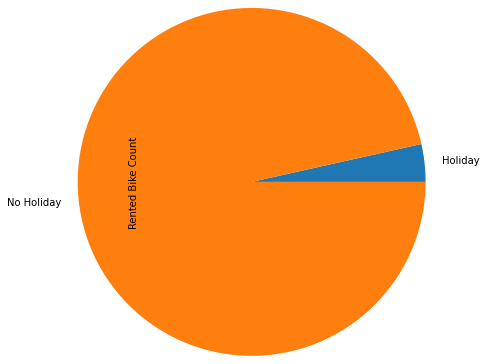

In [ ]:
bike_data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=2)

**We see that holiday rent are very low so let's see on which period extends holidays**

The shape of this Df is 432 lines and 16 columns, it means that there are only 18 days of holidays in Korea which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

In [ ]:
dfHoliday=bike_data.loc[bike_data['Holiday'] == 'Holiday']

In [ ]:
dfHoliday.shape

(432, 16)

**Let's plot the rent of bikes following the state of the weather**

**We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes**

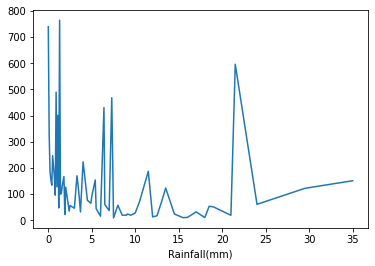

In [ ]:
bike_data.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

**This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this**

We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

In [ ]:
bike_data.loc[(bike_data['Rainfall(mm)']>20)&(bike_data['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8


**We can see on the y-axis, the amount of rents is very low**

When we have more than 4 cm of snow, the bike rents is much lower

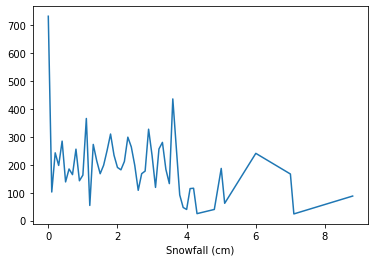

In [ ]:
bike_data.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

**We create the variable to encode WeekDay**

In [ ]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

bike_data['WeekDayEncoding']=bike_data['WeekDay'].map(mapping_dictDay)

#Data Modeling

We have to keep in mind that the most correlated features to the target are :


*   the solar radiation
*   the hour
*   the temperature
We have to drop some features that are not important to our target


**Let's import libraires needed in this modeling part**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Functions
Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
 #Making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')


  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

**Creating function to run diffirent models**`

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    f.drop(['Rented Bike Count'],axis=1)
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')


    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

**Creating function to get feature importance**

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

Lime tablular

In [ ]:
pip install lime

In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

#Train | Test Split for LR

In [ ]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
X.shape

(8760, 23)

In [ ]:
y=np.sqrt(final_df['Rented Bike Count'])

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

TypeError: ignored

#Mutiple Linear Regression
We tried to drop some of the features of the X_train_MultipleRegression to see if the score rised but it was not the case. So we kept the feature selection with the best score Furthermore, we don't scale data in Linear Regression, but if we did we would first have to split into train and test set

#Present all the results of every model in a data frame and plot these in function of the model

#Linear Regresseion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression model

linear_model= LinearRegression()

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

TypeError: ignored